## Otimização de projeto em engenharia mecânica

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
%matplotlib inline

### Função, gradiente e hessiana

* $f(x)$ - função a ser minimizada
* $\nabla f(x)$ - gradiente de $f(x)$
* $\nabla^2 f(x)$ - hessiana de $f(x)$

In [5]:
def func(x0,pen=False):
    x1, x2 = x0[0],x0[1]
    if not(pen):
        return((1 - x1)**2 + 100* (x2 - x1**2)**2)
    else:
        P = max(x2 - 0.5,0)**2
        return((1 - x1)**2 + 100* (x2 - x1**2)**2 +
               r*P)

def grad(x0,pen=False):
    x1, x2 = x0[0],x0[1]
    if not(pen):
        return(np.array([400*x1**3 - 400*x1*x2 +
                     2*x1 - 2, 200*x2 -
                     200*x1**2]).reshape((2,1)))
    else:
        if x2 > 0.5:
            P = 2 * max(x2 - 0.5,0)
        else:
            P = 0
        return(np.array([400*x1**3 - 400*x1*x2 +
                         2*x1 - 2, 200*x2 - 200*x1**2
                        + r * P]).reshape((2,1)))

def hess(x0,pen=False):
    x1, x2 = x0[0],x0[1]
    if not(pen):
        return(np.array([1200*x1**2 - 400*x2 + 2,
                        -400*x1, -400*x1,
                         200]).reshape((2,2)))
    else:
        if x2 >= 0.5:
            P = 1
        else:
            P = 0
        return(np.array([1200*x1**2 - 400*x2 + 2,
                        -400*x1, -400*x1, 200 +
                         r * P]).reshape((2,2)))

def direction(x0,flag,alpha=1,d2f=0,pen=False):
    if flag == 0:
        d = -grad(x0,pen).T
    elif flag == 1:
        df = grad(x0,pen)
        if type(d2f) == int:
            d2f = hess(x0,pen)
        try:
            d = solve(d2f,-df,sym_pos=True,check_finite=True).T
        except:
            l = 1e2
            d2f = d2f + l * np.eye(2)
            d = solve(d2f,-df).T
            while func(x0,pen) < func(x0 + alpha*d[0],pen):
                l = l * 2
                d2f = d2f + l * np.eye(2)
                d = solve(d2f,-df).T
    return(d)

def hess_num(x0,df,alpha,d,H=np.eye(2),pen=False):
    try:
        solve(H,-df,check_finite=True).T
    except:
        H = np.eye(2)
    c = grad(x0 + alpha * d,pen)
    y = c - df
    s = alpha * d
    D = np.matmul(y,y.T) / np.dot(y.T[0],s)
    E = np.matmul(df,df.T) / np.dot(df.T[0],d)
    return(H + D + E)

def step(x0,d,inc=1e-6,pen=False):
    soma = 0
    f1 = func(x0,pen)
    m = (np.sqrt(5) + 1) / 2    
    for i in range(100):
        soma += m**i
        if func(x0+inc*(soma)*d,pen) > f1 and i > 0:
            break
        elif func(x0+inc*(soma)*d,pen) > f1 and i == 0:
            inc = inc / 10
    I = inc * m**(i-1)*(1+m)
    T = 1 / m
    Au = inc * (soma)
    Al = inc * (soma - m**i*(1+1/m))
    Ab = T * I + Al
    Aa = (1-T) * I + Al
    fa = func(x0+Aa*d,pen)
    fb = func(x0+Ab*d,pen)
    while I > 1e-3:
        if fa < fb:
            Au, Ab = Ab, Aa    
            Aa = Al + (1-T) * (Au-Al)
            fb, fa = fa, func(x0+Aa*d,pen)
        elif fa > fb:
            Al, Aa = Aa, Ab            
            Ab = T * (Au-Al) + Al
            fa, fb = fb, func(x0+Ab*d,pen)
        else:
            Al,Au = Aa, Ab            
            Ab = T * (Au-Al) + Al
            Aa = (1-T) * (Au-Al) + Al
            fa = func(x0+Aa*d,pen)
            fb = func(x0+Ab*d,pen)
        I = Au - Al
    A = 0.5*(Au+Al)
    return(A)

#### Função teste

* Rosenbrock's banana function

/home/julionaojulho/.local/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


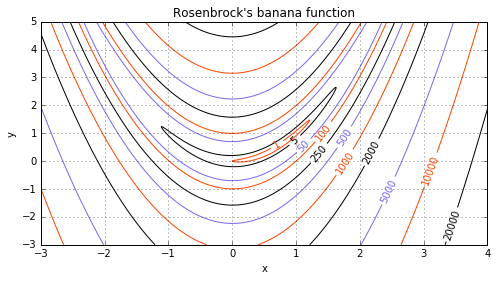

In [266]:
xx = np.linspace(-3,4,1000)
yy = np.linspace(-3,5,1000)
x1,x2 = np.meshgrid(xx,yy)
r = 1e0
#Z = 10*x1**4 - x2*20*x1**2 +\
#           10*x2**2 + x1**2 -2*x1 + 5
P = (x2 - 0.5)**2
num = np.argmin(P)/1000
P[0:num] = 0
Z = (1 - x1)**2 + 100* (x2 - x1**2)**2 +\
           r * P

levels = [1,5,50,100,250,500,1e3,2e3,5e3,1e4,2e4,1e6]
cors = ('#FF4500','#000000','#7B68EE')*5
manual_locs = [(0.7,0.6),(1.1,0.6),(1,0.7),
               (1.4,1.1),(1.3,0.4),(1.8,0.8),
              (1.8,-0.1),(2.2,0.3),(2.4,-1),
              (3.1,-0.3),(4.4,-3)]
plt.figure(figsize=(8,4))
cp = plt.contour(x1,x2,Z,levels,colors=cors)
forms = {i:'{}'.format(int(i)) for i in cp.levels}
plt.clabel(cp, inline=True,fontsize=10,
           fmt=forms,manual=manual_locs)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Rosenbrock's banana function")
#plt.axis([-1,2,-2,4])
plt.grid('on')

Algoritmo de minimização

2.0
 (x,y) = (0.794, 0.630) é minimizador 
f(x,y) = 0.059 é o mínimo 
Mínimo encontrado após 25 iterações
(0.79424451359286641, 0.62952905648295676) 0.0592808745088 25 1.19352926427e-07


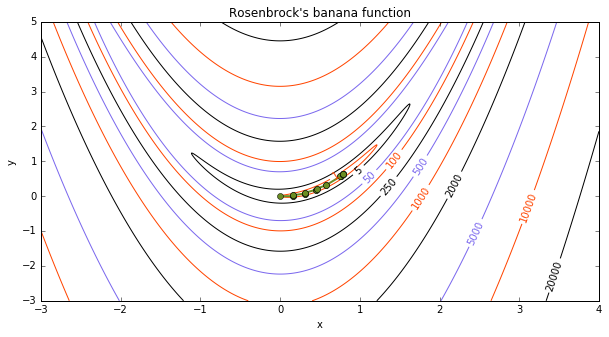

In [268]:
epsilon = 1e-6
pen = True
x0 = [0,0]
f,df,d2f = func(x0,pen), grad(x0,pen), 1*np.eye(2)
print(np.linalg.norm(df))
x = x0
xp,yp,fp = [x0[0]], [x0[1]], [f]
d = direction(x,1,1,d2f,pen)[0]
inc = 0.5
a = step(x,d,inc,pen)
#d1,d2 = [],[]#[a*d[0]],[a*d[1]]

for i in range(500):
    if np.linalg.norm(df) < epsilon:
        break
    elif func(x + a*d,pen) <= f:
        while func(x + a*d,pen) <= f:
            dx = a*d
            x += dx
            f,df = func(x,pen), grad(x,pen)
            a = step(x,d,inc,pen)
    else:        
        #print(np.dot(d,df)<-0.05*np.linalg.norm(df)*np.linalg.norm(d),'\n')
        #print(np.linalg.norm(df)*0.001 < np.linalg.norm(d))                    
        #d1.append(dx[0]),d2.append(dx[1])        
        #xp.append(x[0]),yp.append(x[1])
        d = direction(x,1,a,d2f,pen)[0]        
        d2f = hess_num(x,df,a,d,d2f,pen)
        a = step(x,d,inc,pen)                  
    #d1.append(dx[0]),d2.append(dx[1])  
    
    f,df = func(x,pen), grad(x,pen)
    xp.append(x[0]),yp.append(x[1])
print(' (x,y) = ({0:.3f}'.format(x[0]) + 
      ', {0:.3f}'.format(x[1])+') é minimizador',
      '\nf(x,y) = {0:.3f}'.format(f) + 
      ' é o mínimo',
      '\nMínimo encontrado após {} iterações'.format(i))
print((x[0],x[1]),f,i,np.linalg.norm(df))
#xp,yp = np.array(xp),np.array(yp)
#d1,d2 = np.array(d1),np.array(d2)
plt.figure(figsize=(10,5))
cp = plt.contour(x1,x2,Z,levels,colors=cors)
plt.plot(xp,yp,color='#6B8E23',marker='o',
         ls='-',mfc='#6B8E23',linewidth=2)
plt.clabel(cp,cp.levels,rightside_up=True,
           inline_spacing=5,fmt=forms,inline=True,
           fontsize=10,manual=manual_locs)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Rosenbrock's banana function")
#plt.axis([-2,5,-2,6]);